Вариант 8

In [ ]:
from google.colab import drive
drive.mount ('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy import stats

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
Astro = pd.read_csv("/content/drive/My Drive/astronauts.csv",sep=',', nrows=1000)
Astro.head()

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN


In [ ]:
Astro = Astro.fillna("-")

In [ ]:
Astro.columns

Index(['Name', 'Year', 'Group', 'Status', 'Birth Date', 'Birth Place',
       'Gender', 'Alma Mater', 'Undergraduate Major', 'Graduate Major',
       'Military Rank', 'Military Branch', 'Space Flights',
       'Space Flight (hr)', 'Space Walks', 'Space Walks (hr)', 'Missions',
       'Death Date', 'Death Mission'],
      dtype='object')

In [ ]:
Astro['Space Walks (hr)'].max()



67.0

In [ ]:
Astro[(Astro['Space Walks (hr)']==67)]

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
203,Michael E. Lopez-Alegria,1992.0,14.0,Retired,5/30/1958,"Madrid, Spain",Male,US Naval Academy; US Naval Postgraduate School,Systems Engineering,Aeronautical Engineering,Captain,US Navy (Retired),3,6190,10,67.0,"STS-73 (Columbia), STS-92 (Discovery), STS-113...",-,-


<BarContainer object of 357 artists>

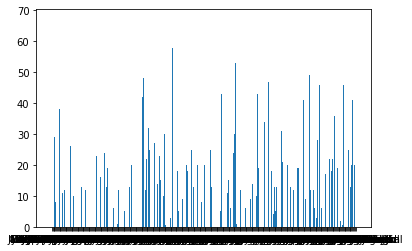

In [ ]:
names = Astro.Name
hours = Astro['Space Walks (hr)']

plt.bar(names, hours)

In [ ]:
Astro.Name.count()


357

In [ ]:
Universities = Astro['Alma Mater'].value_counts().to_frame()
Universities = Universities.reset_index()
Universities.columns = ['Names', 'Count']
Universities

,Names,Count
0,US Naval Academy; US Naval Postgraduate School,11
1,US Naval Academy,10
2,US Air Force Academy; Purdue University,7
3,Purdue University,7
4,US Naval Academy; MIT,5
...,...,...
264,University of Rochester; California Institute ...,1
265,California Polytechnic Institute,1
266,Muskingum College,1
267,Southeast Missouri State; University of Missouri,1


<BarContainer object of 269 artists>

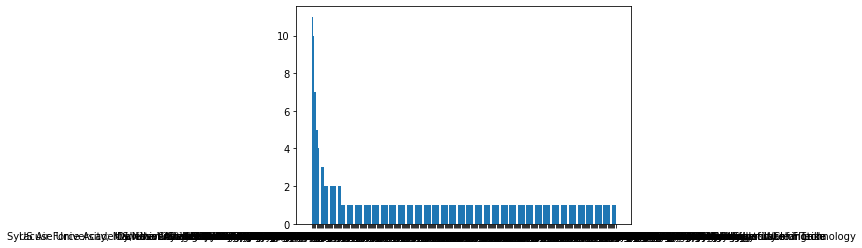

In [ ]:
names = Universities.Names
counts = Universities.Count

plt.bar(names,counts)

In [ ]:
print((Astro[(Astro['Military Rank'])!='-'])['Name'].count())
print('Военные')

207
Военные


In [ ]:
print(Astro.Name.count()-207)
print('Гражданские')

150
Гражданские


In [ ]:
Ranks = Astro['Military Rank'].value_counts().to_frame()
Ranks = Ranks.reset_index()
Ranks = Ranks.loc[Ranks['index']!='-']
Ranks


,index,Military Rank
1,Colonel,89
2,Captain,61
3,Commander,13
4,Lieutenant Colonel,8
5,Major,5
6,Major General,4
7,Brigadier General,4
8,Lieutenant Commander,3
9,Rear Admiral,2
10,Lieutenant General,1


In [ ]:
Astro['Gender'].value_counts()

Male      307
Female     50
Name: Gender, dtype: int64

In [ ]:
Death = Astro['Death Mission'].value_counts().to_frame()
Death = Death.reset_index()
Death = Death.loc[Death['index']!='-']
Death

,index,Death Mission
1,STS 51-L (Challenger),7
2,STS-107 (Columbia),6
3,Apollo 1,2


In [ ]:
def get_state(state):
  return state.split(',')[-1].strip()
State = Astro['Birth Place'].apply(get_state)
State

0      CA
1      MT
2      NY
3      MO
4      NJ
       ..
352    IN
353    IL
354    MI
355    CA
356    NJ
Name: Birth Place, Length: 357, dtype: object

In [ ]:

Astro['State'] = State
Astro.head()

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,State
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,-,-,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",-,-,CA
1,Loren W. Acton,-,-,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,-,-,1,190,0,0.0,STS 51-F (Challenger),-,-,MT
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",-,-,NY
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",-,-,MO
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",-,-,NJ


In [ ]:
Astro.State.value_counts()

NY             30
CA             25
TX             23
OH             21
PA             20
               ..
Canada          1
Argentina       1
NE              1
Hong Kong       1
Netherlands     1
Name: State, Length: 65, dtype: int64

In [ ]:
Astro[(Astro['State']=='TX')].describe()

,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr)
count,23.000000,23.000000,23.000000,23.000000
mean,2.173913,1164.652174,1.043478,5.152174
std,1.402989,1593.780571,1.521909,8.311321
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,217.000000,0.000000,0.000000
50%,2.000000,546.000000,0.000000,0.000000
75%,3.000000,1249.000000,2.000000,9.500000
max,5.000000,5857.000000,4.000000,25.000000


In [ ]:
Astro = Astro.loc[Astro['Undergraduate Major'] != '-']
Astro


,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,State
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,-,-,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",-,-,CA
1,Loren W. Acton,-,-,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,-,-,1,190,0,0.0,STS 51-F (Challenger),-,-,MT
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",-,-,NY
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",-,-,MO
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",-,-,NJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,David A. Wolf,1990.0,13.0,Retired,8/23/1956,"Indianapolis, IN",Male,Purdue University; Indiana University,Electrical Engineering,Medicine,-,-,3,4044,7,41.0,STS-58 (Columbia). STS-86/89 (Atlantis/Endeavo...,-,-,IN
353,Neil W. Woodward III,1998.0,17.0,Retired,7/26/1962,"Chicago, IL",Male,MIT; University of Texas-Austin; George Washin...,Physics,Physics; Business Management,Commander,US Navy,0,0,0,0.0,-,-,-,IL
354,Alfred M. Worden,1966.0,5.0,Retired,2/7/1932,"Jackson, MI",Male,US Military Academy; University of Michigan,Military Science,Aeronautical & Astronautical Engineering,Colonel,US Air Force (Retired),1,295,1,0.5,Apollo 15,-,-,MI
355,John W. Young,1962.0,2.0,Retired,9/24/1930,"San Francisco, CA",Male,Georgia Institute of Technology,Aeronautical Engineering,-,Captain,US Navy (Retired),6,835,3,20.0,"Gemini 3, Gemini 10, Apollo 10, Apollo 16, STS...",-,-,CA


In [ ]:
Genders = Astro.Gender.to_frame()
Genders


,Gender
0,Male
1,Male
2,Male
3,Male
4,Male
...,...
352,Male
353,Male
354,Male
355,Male


In [ ]:
from sklearn.preprocessing import LabelEncoder# instantiate labelencoder object
le = LabelEncoder()
Genders_encoded = Genders.apply(le.fit_transform)
print(Genders_encoded)

     Gender
0         1
1         1
2         1
3         1
4         1
..      ...
352       1
353       1
354       1
355       1
356       1

[357 rows x 1 columns]


In [ ]:
Missions = Astro.Missions.to_frame()
Missions.fillna("None")
Missions_encoded = Missions.apply(le.fit_transform)
print(Missions_encoded)


     Missions
0         127
1          74
2         166
3         199
4          16
..        ...
352       235
353       305
354         5
355        17
356       130

[357 rows x 1 columns]


In [ ]:
from scipy import stats
stats.spearmanr(Genders_encoded, Missions_encoded)


SpearmanrResult(correlation=-0.0711238587245997, pvalue=0.1799752029202621)

In [ ]:
y = np.hstack(Genders_encoded)
print(Genders_encoded)

     Gender
0         1
1         1
2         1
3         1
4         1
..      ...
352       1
353       1
354       1
355       1
356       1

[357 rows x 1 columns]


In [ ]:
f1 = np.asarray(Genders_encoded)
f1 = np.hstack(f1)

In [ ]:
print(f1)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1
 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1]


In [ ]:
f2 = np.asarray(Missions_encoded)
f2 = np.hstack(f2)

In [ ]:
print(f2)

[127  74 166 199  16 210  44 292  10 122 287 128 183 119  24 126 297 305
 169 178 203  28 263  74 305   1 138 167 281 275 238 150 241  22 149 219
 270  13 274 158  74 213 100  45  68 291 305  98 221 200 305 305 124 113
 184 103  39 304 175 181 153  88  26   0 144  89 305 282 245 215 100  86
 223  58 228 267 242  14  20  41  83  29  77  90 276 188   9 280 231 212
 218 125 209   6  84 179 161 285   9  74 162 305   8 258 115 232 147  27
 305  62  78 208 156 137  97 133 305 106 170 195 141 272 164  70 303 186
 254 304  48 305  38 185 146  15 295  81 305  65 249  70  37 250 197   3
 246 143 193 192 225  50 194 256  56 224  74 204 207 155 112 189 116  42
 293  96  72 305  31 268 195 152 298   5 173  82 211 196 261 145 139 236
 294  94 102  95 300 276 148 154 260 251 171  60 216 264 290  64  33 283
 243 271 276 305 108 266 305  79 302 134  23 172 277  76 111 151 104  99
   7 145 233  82  59  49 100 177  19 191  47 187 198 296 135 161 305   4
 123 105  57 239  75  88  53 222 278 131 142  87 30

In [ ]:
stats.pearsonr(f1, f2)

(-0.06908093527697233, 0.19283968266546073)

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([-0.06908094, -0.04288887, -0.01669681,  0.00949525,  0.03568731,
         0.06187937,  0.08807144,  0.1142635 ,  0.14045556,  0.16664762,
         0.19283968]),
 <a list of 10 Patch objects>)

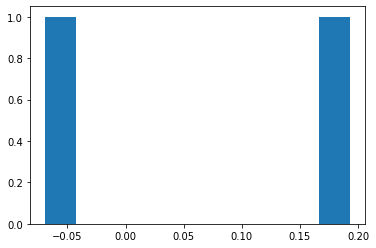

In [ ]:
plt.hist(stats.pearsonr(f1,f2))

In [ ]:
stats.spearmanr(f1, f2)

SpearmanrResult(correlation=-0.0711238587245997, pvalue=0.1799752029202621)

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([-0.07112386, -0.04601395, -0.02090405,  0.00420586,  0.02931577,
         0.05442567,  0.07953558,  0.10464548,  0.12975539,  0.1548653 ,
         0.1799752 ]),
 <a list of 10 Patch objects>)

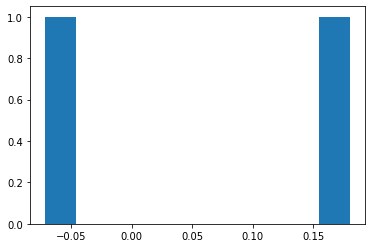

In [ ]:
plt.hist(stats.spearmanr(f1,f2))